<a href="https://colab.research.google.com/github/MostafaFiroozi/Brain-Scan-Denoising/blob/main/Brain_Scan_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adding the required libraries

@thanks to digitalsreeni utube channle

In [ ]:

from skimage import io,data, img_as_float
from scipy import ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


Reading and cropping the image

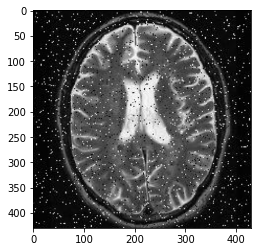

In [ ]:
img=io.imread("/content/690349.fig.005d.jpg")
h,w,_=img.shape
img=img[int(w/10):int(w*(9/10)) , int(h/10):int(h*(9/10)),:]# Cropping the image
plt.imshow(img)

Sigma size= 1


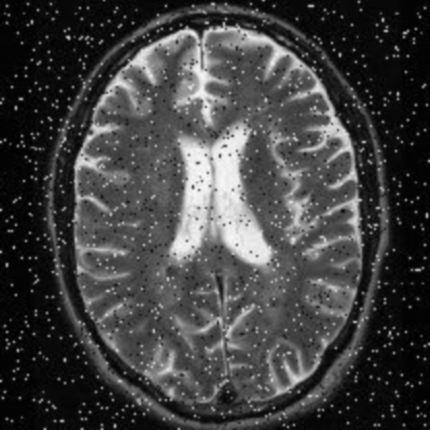

Sigma size= 2


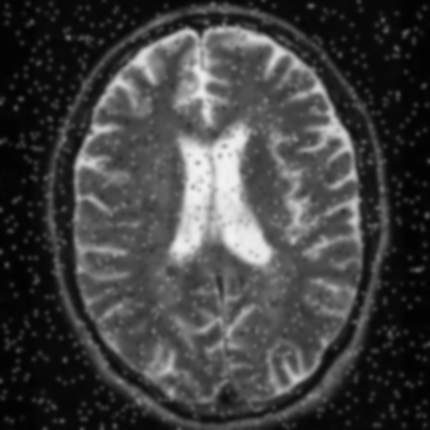

Sigma size= 3


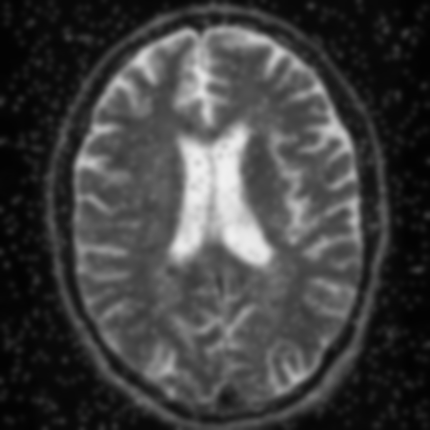

Sigma size= 4


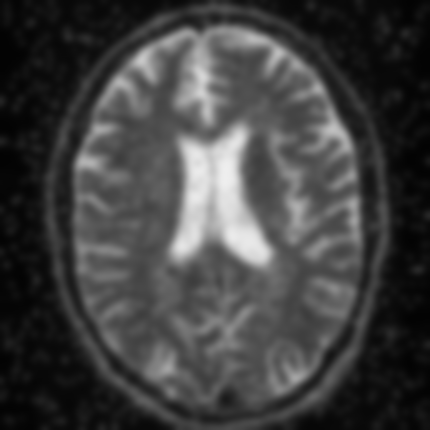

Sigma size= 5


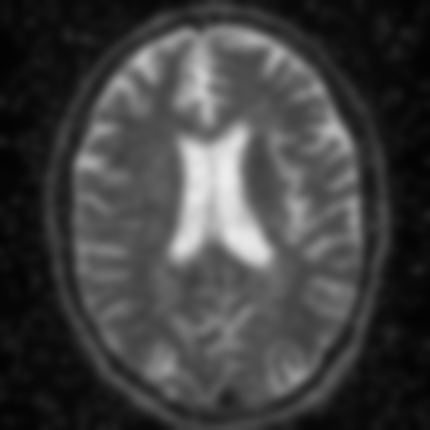

Sigma size= 6


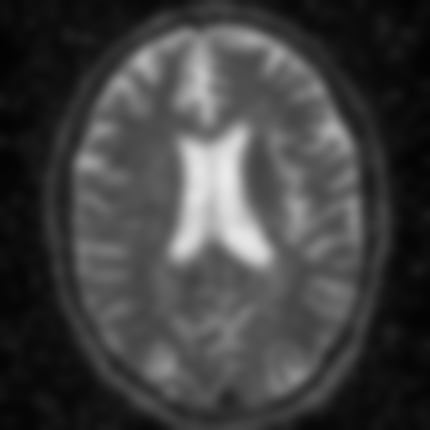

Sigma size= 7


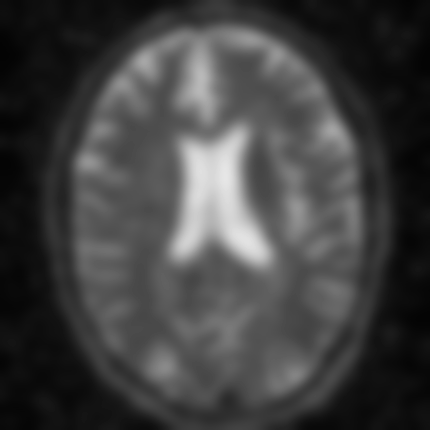

Sigma size= 8


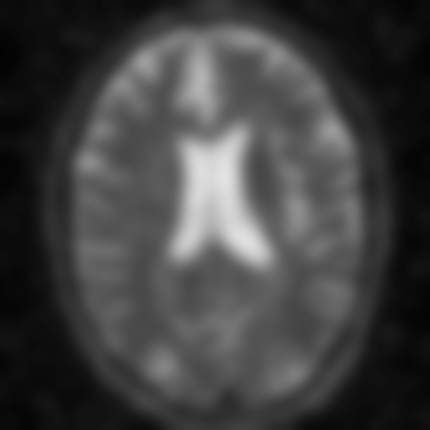

Sigma size= 9


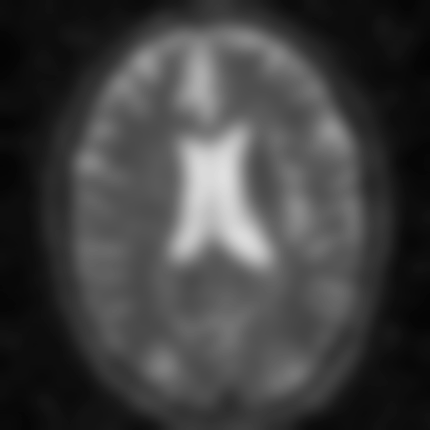

In [ ]:
for i in range(1,10):
  gaussian_img=nd.gaussian_filter(img,sigma=i)
  print("Sigma size=",i)
  cv2_imshow(gaussian_img)

The image gets cleaned, but it is blurres! Which means we are loosing a lot of information. So, the gaussian filter is not a good idea!

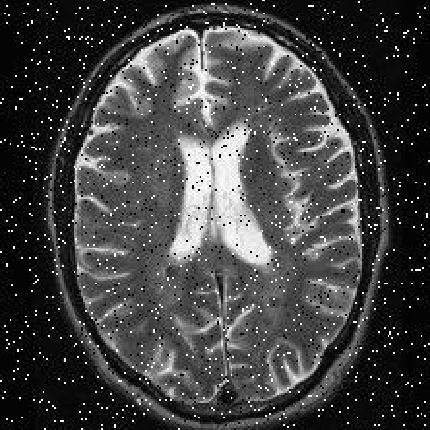

Kernel size= 1


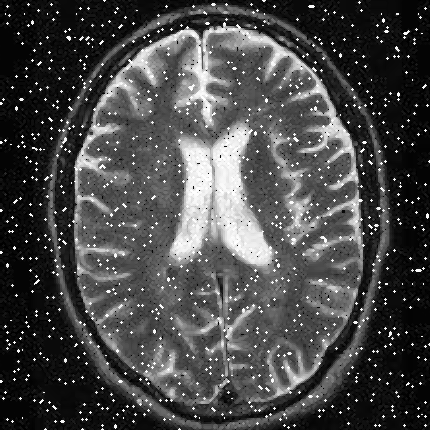

Kernel size= 2


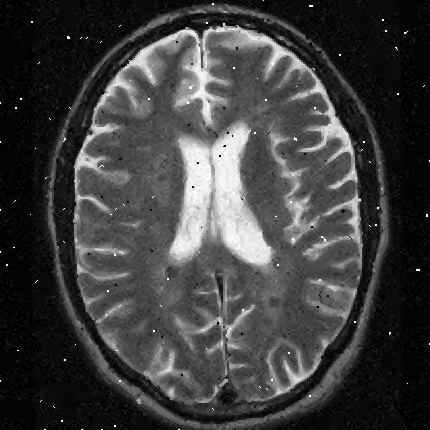

Kernel size= 3


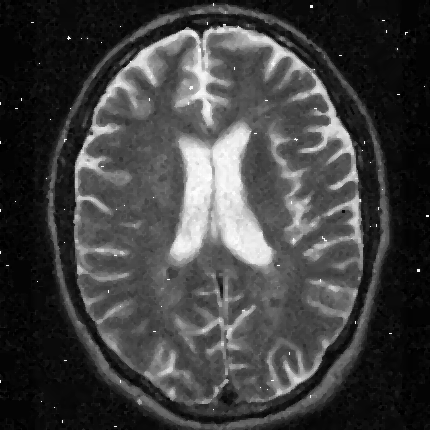

Kernel size= 4


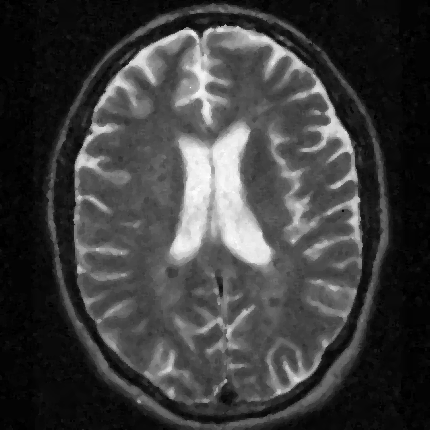

Kernel size= 5


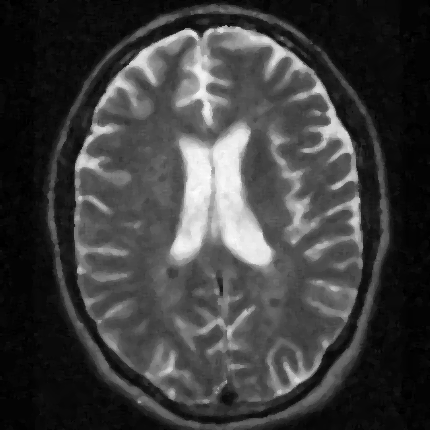

Kernel size= 6


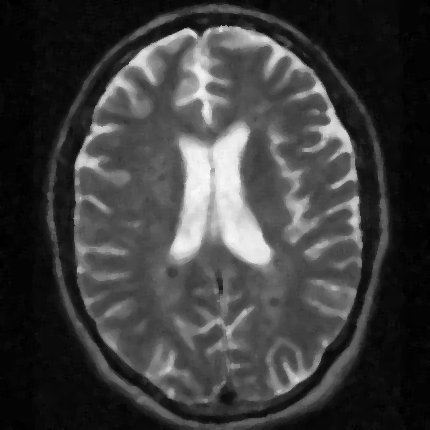

Kernel size= 7


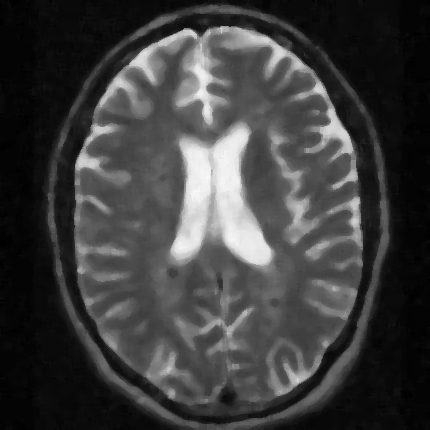

Kernel size= 8


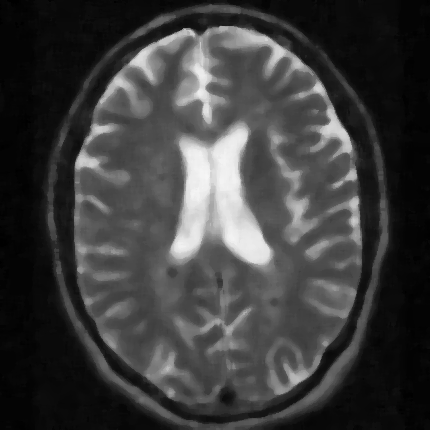

Kernel size= 9


In [ ]:
for i in range(1,10):
  median_filtered_img=nd.median_filter(img,size=i)
  cv2_imshow(median_filtered_img)
  print("Kernel size=",i)

But with the median filter of the kernel size of 5, the image is denoised, and the edges are preserved! So it cood be a better choise in comparison to the gaussian filter.

### Denoising Using non local means

estimated noise standard deviation = 0.02098395741587979


/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


PSNR (noisy) = inf
PSNR (slow) = 41.32
PSNR (slow, using sigma) = 41.33
PSNR (fast) = 42.07
PSNR (fast, using sigma) = 39.61


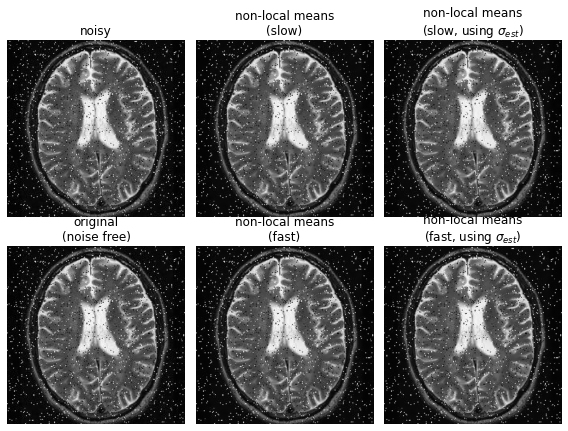

[-41.87252852 -41.87252852 -41.87252852]


In [ ]:


from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

img=io.imread("/content/690349.fig.005d.jpg")
h,w,_=img.shape
img=img[int(w/10):int(w*(9/10)) , int(h/10):int(h*(9/10)),:]
noisy = img_as_float(img)
#You can not show an img using cv2.imshow after turing that to float type

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title('non-local means\n(slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title('non-local means\n(fast, using $\\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)

print(f"PSNR (noisy) = {psnr_noisy:0.2f}")
print(f"PSNR (slow) = {psnr:0.2f}")
print(f"PSNR (slow, using sigma) = {psnr2:0.2f}")
print(f"PSNR (fast) = {psnr_fast:0.2f}")
print(f"PSNR (fast, using sigma) = {psnr2_fast:0.2f}")

plt.show()

In [ ]:
print(sum(sum(denoise2-noisy))/sum(sum(denoise2)))#calculating the change in this pic

[-0.00087852 -0.00087852 -0.00087852]


Nl means algorythm shows a very few change in the picture, so using this algorithm seems not to be feasble to be used in this image. The reason for that could be the low value of the estimated noise standard distribution.

### **Conclution**

Between the 3 algorithms that had been tested, the best one would be a median filter with a kernel size of 5!!!